In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [28]:
data = {
    'Hours_Study': [2, 3, 4, 5, 6, 7, 8],
    'Sleep_Hours': [7, 6, 8, 7, 6, 5, 4],
    'Coffee': [1, 2, 1, 3, 2, 4, 3],
    'Score': [65, 70, 75, 80, 85, 90, 88]
}

df=pd.DataFrame(data)
print(df)

   Hours_Study  Sleep_Hours  Coffee  Score
0            2            7       1     65
1            3            6       2     70
2            4            8       1     75
3            5            7       3     80
4            6            6       2     85
5            7            5       4     90
6            8            4       3     88


In [29]:
x=df.iloc[:,0:3]
y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

print("r2 score:",r2_score(y_test,y_pred))
print("coefficient (b1,b2,b3):",lr.coef_[0])
print("intercept (b0):",lr.intercept_)
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score: -9.88888888888889
coefficient (b1,b2,b3): 5.0
intercept (b0): 54.999999999999986
MAE: 3.5
MSE: 24.5
RMSE 4.949747468305833


AFTER SCRATCH

In [37]:
class MLR:
    def __init__(self):
        self.coef_=None
        self.intercept_=None

    def fit(self,x_train,y_train):
        x_train=np.insert(x_train,0,1,axis=1)

        betas=np.linalg.inv(np.dot(x_train.T,x_train)).dot(x_train.T).dot(y_train)
        self.intercept_=betas[0]
        self.coef_=betas[1:]

    def predict(self,x_test):
        
        return np.dot(x_test,self.coef_)+self.intercept_

    

In [40]:
lr2=MLR()
lr2.fit(x_train,y_train)
y_pred2=lr2.predict(x_test)
print("r2 score:",r2_score(y_test,y_pred2))
print("coefficient (b1,b2,b3):",lr2.coef_[0])
print("intercept (b0):",lr2.intercept_)
print("MAE:",mean_absolute_error(y_test,y_pred2))
print("MSE:",mean_squared_error(y_test,y_pred2))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred2)))

r2 score: -9.888888888885926
coefficient (b1,b2,b3): 4.999999999999959
intercept (b0): 54.99999999999835
MAE: 3.499999999999851
MSE: 24.499999999993335
RMSE 4.949747468305159


SHOW MULTIPLE LINEAR

c:\Users\rohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


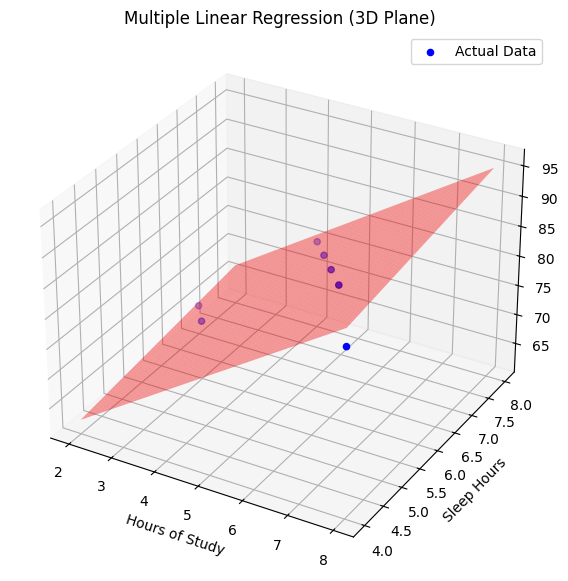

In [30]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Sample dataset
data = {
    'Hours_Study': [2, 3, 4, 5, 6, 7, 8],
    'Sleep_Hours': [7, 6, 8, 7, 6, 5, 4],
    'Score': [65, 70, 75, 80, 85, 90, 88]
}
df = pd.DataFrame(data)

# Features (X) and target (y)
X = df[['Hours_Study', 'Sleep_Hours']]
y = df['Score']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predictions (for surface)
x_surf, y_surf = np.meshgrid(
    np.linspace(X['Hours_Study'].min(), X['Hours_Study'].max(), 100),
    np.linspace(X['Sleep_Hours'].min(), X['Sleep_Hours'].max(), 100)
)

# Create a plane (Z = prediction from regression model)
z_surf = model.predict(np.column_stack([x_surf.ravel(), y_surf.ravel()]))
z_surf = z_surf.reshape(x_surf.shape)

# Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter points (actual data)
ax.scatter(X['Hours_Study'], X['Sleep_Hours'], y, color='blue', label="Actual Data")

# Regression plane
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.4)

ax.set_xlabel('Hours of Study')
ax.set_ylabel('Sleep Hours')
ax.set_zlabel('Score')
plt.title("Multiple Linear Regression (3D Plane)")
plt.legend()
plt.show()

